Demo - Classification with Multilayer Perception

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

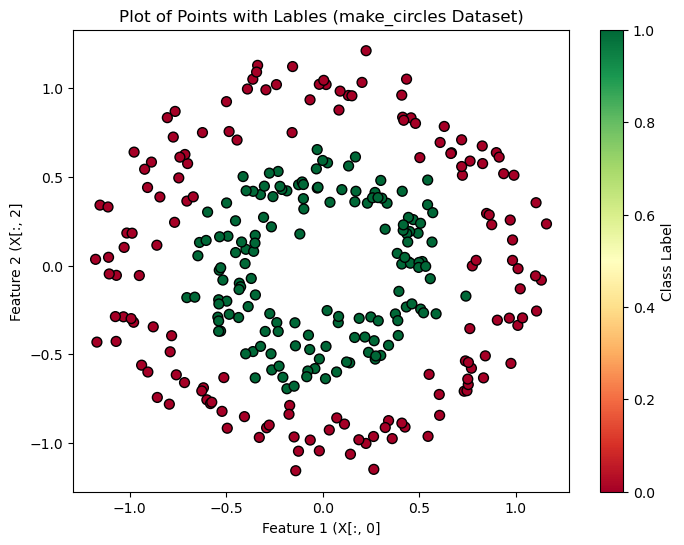

In [8]:
#Generate synthetic data(circle)
X, y = make_circles(n_samples=300, noise = 0.1, factor = 0.5, random_state=0)

#Plot the points with their labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (X[:, 0]')
plt.ylabel('Feature 2 (X[:, 2]')
plt.title('Plot of Points with Lables (make_circles Dataset)')
plt.colorbar(label='Class Label')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

In [15]:
# Function to update and dis[lay the plot
def update_plot(hidden_layer_size):
    #Generate synthetic data (circle)
    # X, y = make_circles(n_samples=300, noise = 0.1, factor = 0.7, random_state=0)
    # Create multi-layer perceptron(MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='relu', max_iter=3000, random_state=1)

    # Fit the classifier to the data
    clf.fit(X, y)

    #Create a grid of points for visualization
    #These are 1D arrays of 100 values each, representing the x and y coordinates of the grid
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)

    # The resulting X_plane and Y_plane are both 100x100 arrays,
    # Representing a grid of 10,000 points
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

    #grid_points is a single 2D array(grid points) of shape(1000, 2)
    # Where each row represents a point in the grid
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    # Predict class labels for the grid points (for decision boundary)
    Z = clf.predict(grid_points)

    #Z.reshape(X_plane.shape) reshapes Z into a 100x100 arr
    Z = Z.reshape(X_plane.shape)

    #Predict class labels for the original data points
    y_pred = clf.predict(X)

    # Clear previous plot
    plt.clf()

    # Plot the decision boundary
    #It is often used to visualize the decision boudary of a model by ploting
    # The predicted class probabilities or labels across a grid of points
    plt.contourf(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha =0.6)

    # Plot the original data points with their predicted labels
    # Separate points for each predicted class
    class_0 = y_pred == 0 # Indices òf points predicted as class 0
    class_1 = y_pred == 1 # Indices òf points predicted as class 1

    plt.scatter(X[class_0, 0], X[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
    plt.scatter(X[class_1, 0], X[class_1, 1], c='green', edgecolors='k', marker='o', s=50, label='Predicted Class 0')

    #Add labels and tittle
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size={hidden_layer_size})')
    plt.show()

# Create a slider for hidden layer size
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size')

# Create an interactive widget
interactive_plot= interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

display(interactive_plot)
    
    

interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…